<a href="https://colab.research.google.com/github/kn9ck/MAT422/blob/master/HW1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 1.3
###1.3.1. QR decomposition
**QR Decomposition** is a method of decomposing a matrix **𝐴** into the product of two **𝑄** and **𝑅**, where **𝑄** is an orthogonal matrix, and **𝑅** is an upper triangular matrix.

In [4]:
import numpy as np

A = np.array([[1, 2],
              [2, 1]])

#QR decomposition
a1 = A[:, 0]  # first column of A
q1 = a1 / np.linalg.norm(a1)  # normalize a1

a2 = A[:, 1]  # second column of A
proj_q1_a2 = np.dot(q1, a2) * q1  # projection of a2 onto q1

u2 = a2 - proj_q1_a2  # subtract the projcetion to get orthogonal component
q2 = u2 / np.linalg.norm(u2)  # normalize to get q2

Q = np.column_stack((q1, q2))

# R = Q^T * A
R = np.dot(Q.T, A)

# verify QR = A
A_reconstructed = np.dot(Q, R)

print("A:\n", A)
print("\nQ: ", Q)
print("\nR: ", R)
print("\nQR:  ", A_reconstructed)

A:
 [[1 2]
 [2 1]]

Q:  [[ 0.4472136   0.89442719]
 [ 0.89442719 -0.4472136 ]]

R:  [[2.23606798e+00 1.78885438e+00]
 [3.33066907e-16 1.34164079e+00]]

QR:   [[1. 2.]
 [2. 1.]]


### 1.3.2. Least-squares problems
Let’s say we have an overdetermined system (more equations than unknowns):

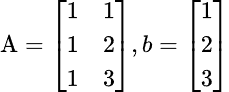

In [5]:

A = np.array([[1, 1],
              [1, 2],
              [1, 3]])
b = np.array([1, 2, 2])

#least-squares
x, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

print("A: ", A)
print("b: ", b)
print("x: ", x)


A:  [[1 1]
 [1 2]
 [1 3]]
b:  [1 2 2]
x:  [0.66666667 0.5       ]


###1.3.3. Linear regression
Let's say we have data points for a simple linear regression problem. We want to fit a line  
 lagrida_latex_editor.png  to the data x = [0,1,2,3] y = [1,2,3,4]

In [6]:

x = np.array([0, 1, 2, 3])
y = np.array([1, 2, 2, 3])

A = np.vstack([np.ones(len(x)), x]).T

# solve least-squares problem to find the coefficients
beta, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)

print("Coefficients (intercept, slope):\n", beta)
print("\nResiduals:\n", residuals)

Coefficients (intercept, slope):
 [1.1 0.6]

Residuals:
 [0.2]
